In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("taxi_tripdata.csv", engine='pyarrow', usecols=["lpep_dropoff_datetime", "passenger_count", "trip_distance"])

#### В датасете есть нулевые значения и потерянные значения перевозки пассажиров.

In [ ]:
df.describe()

,lpep_dropoff_datetime,passenger_count,trip_distance
count,83691,51173.000000,83691.000000
mean,2021-07-16 11:04:18.356370176,1.307858,194.354699
min,2008-12-31 23:27:09,0.000000,0.000000
25%,2021-07-08 20:25:41.500000,1.000000,1.350000
50%,2021-07-16 12:26:04,1.000000,2.760000
75%,2021-07-24 13:13:41.500000,1.000000,6.200000
max,2021-08-01 19:55:44,32.000000,260517.930000
std,NaN,0.984362,4405.549221


<Axes: xlabel='lpep_dropoff_datetime'>

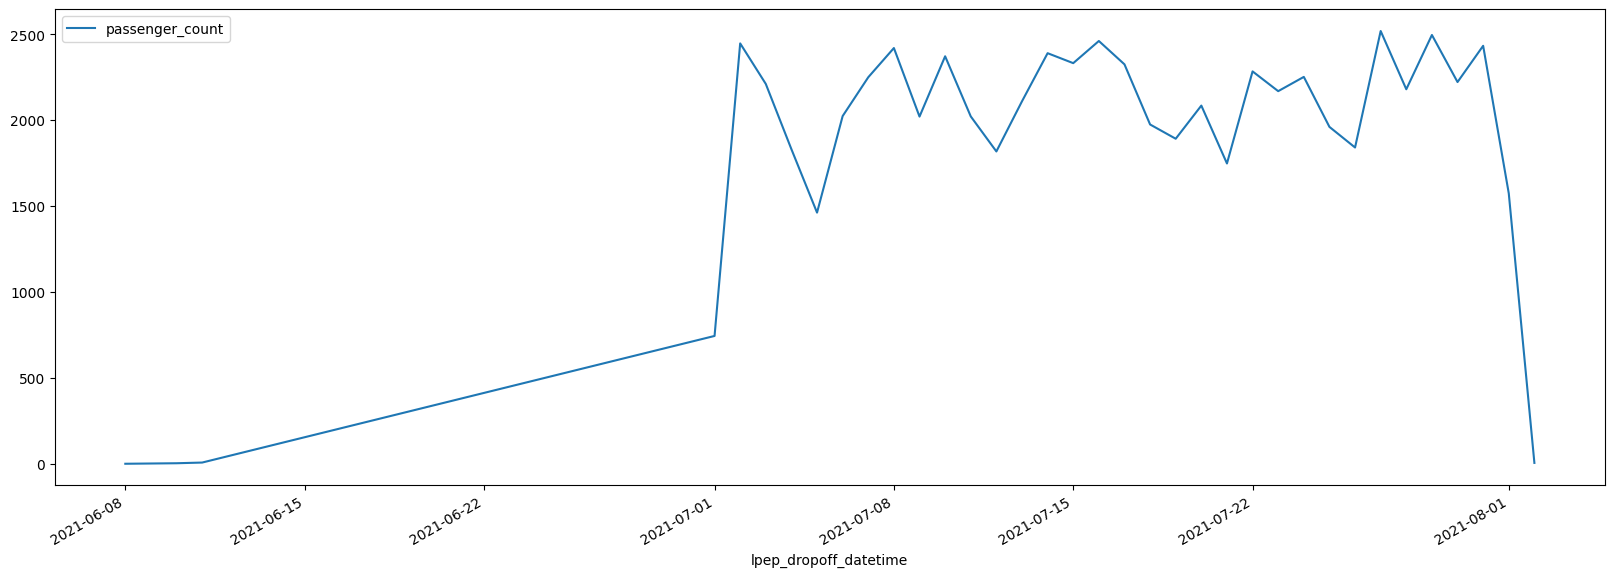

In [8]:
df_dates = df[["lpep_dropoff_datetime", "passenger_count"]].copy()
df_dates = df_dates.dropna()
df_dates["lpep_dropoff_datetime"] = df_dates["lpep_dropoff_datetime"].dt.round('D')
df_dates = df_dates.groupby(by="lpep_dropoff_datetime").sum().reset_index()
df_dates = df_dates[(df_dates["lpep_dropoff_datetime"].dt.year == 2021) & (df_dates["passenger_count"] != 0)]
df_dates.plot(x="lpep_dropoff_datetime", y="passenger_count", figsize=(20, 7))

<Axes: xlabel='lpep_dropoff_datetime'>

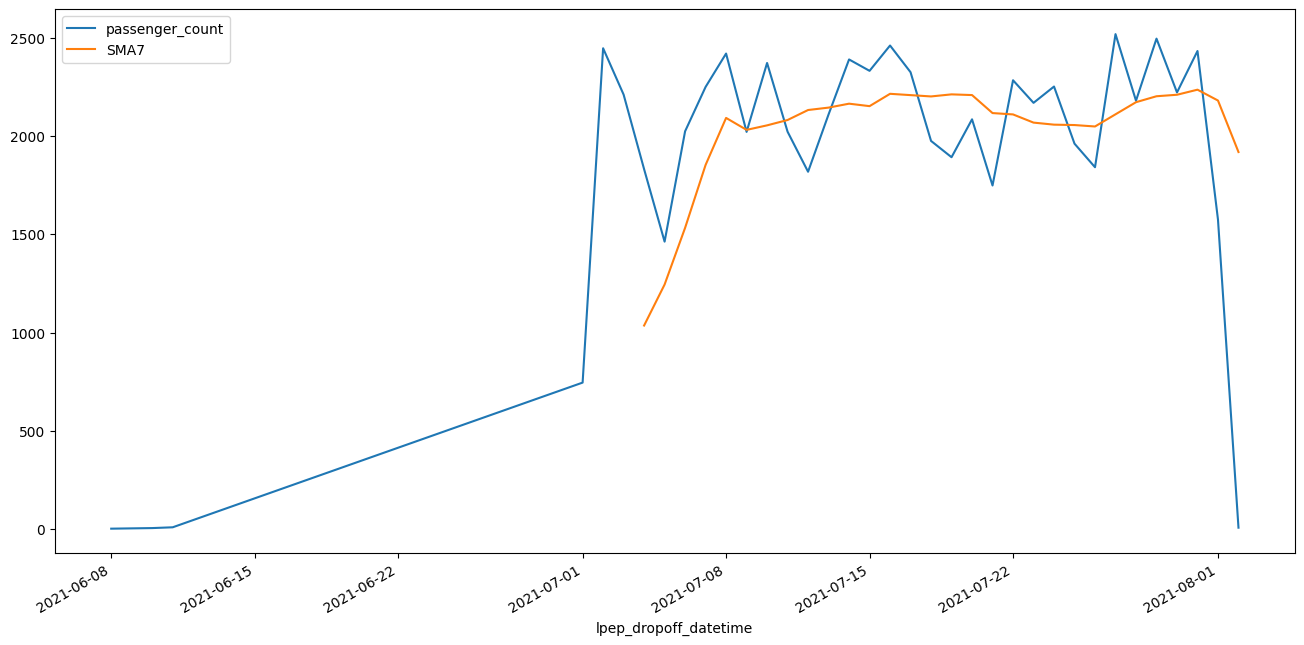

In [ ]:
df_dates_a = df_dates.set_index("lpep_dropoff_datetime")
df_dates_a['SMA7'] = df_dates_a["passenger_count"].rolling(7).mean()
df_dates_a[['passenger_count', 'SMA7']].plot(figsize=(16, 8))

<Axes: xlabel='lpep_dropoff_datetime'>

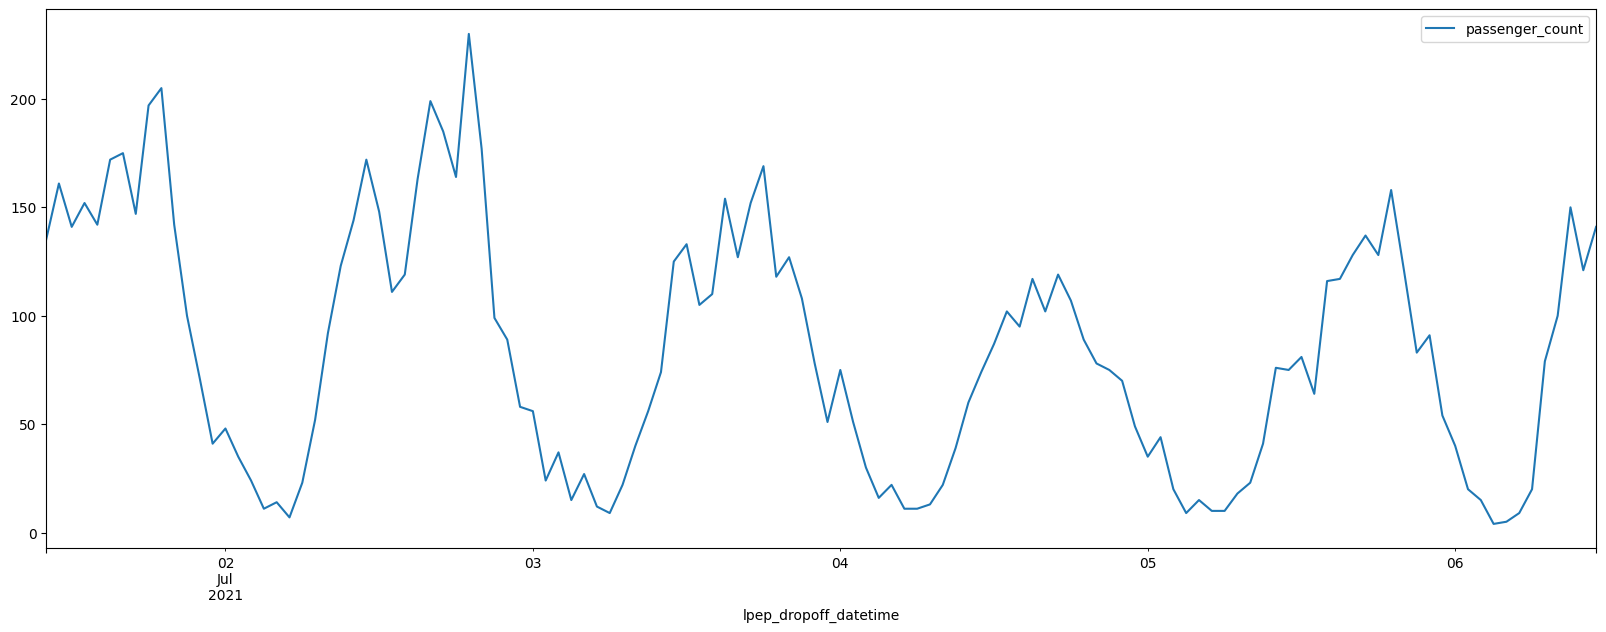

In [ ]:
df_hours = df[["lpep_dropoff_datetime", "passenger_count"]].copy()
df_hours["lpep_dropoff_datetime"] = df_hours["lpep_dropoff_datetime"].dt.round('H')
df_hours = df_hours.groupby(by="lpep_dropoff_datetime").sum().reset_index()
df_hours[24:146].plot(x="lpep_dropoff_datetime", y="passenger_count", figsize=(20, 7))

<Axes: xlabel='lpep_dropoff_datetime'>

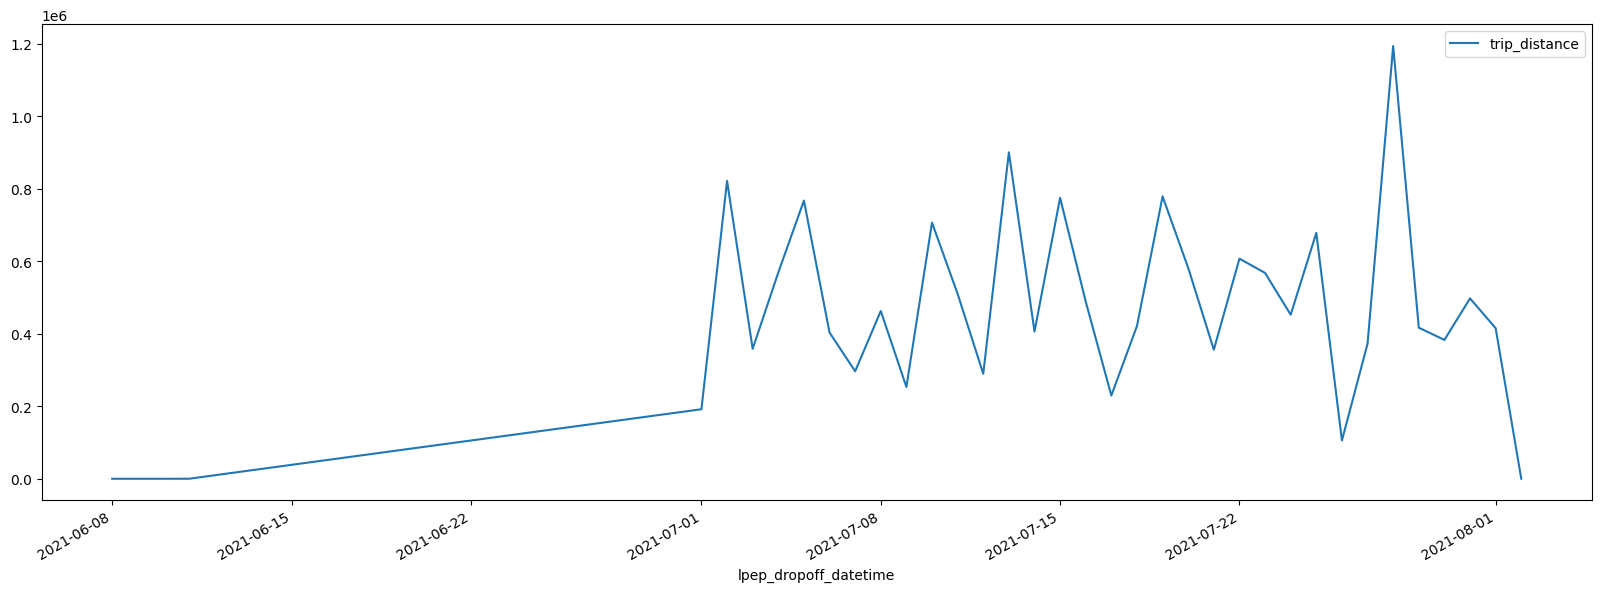

In [9]:
df_dates = df[["lpep_dropoff_datetime", "trip_distance"]].copy()
df_dates = df_dates.dropna()
df_dates["lpep_dropoff_datetime"] = df_dates["lpep_dropoff_datetime"].dt.round('D')
df_dates = df_dates.groupby(by="lpep_dropoff_datetime").sum().reset_index()
df_dates = df_dates[(df_dates["lpep_dropoff_datetime"].dt.year == 2021) & (df_dates["trip_distance"] != 0)]
df_dates.plot(x="lpep_dropoff_datetime", y="trip_distance", figsize=(20, 7))

<Axes: xlabel='lpep_dropoff_datetime'>

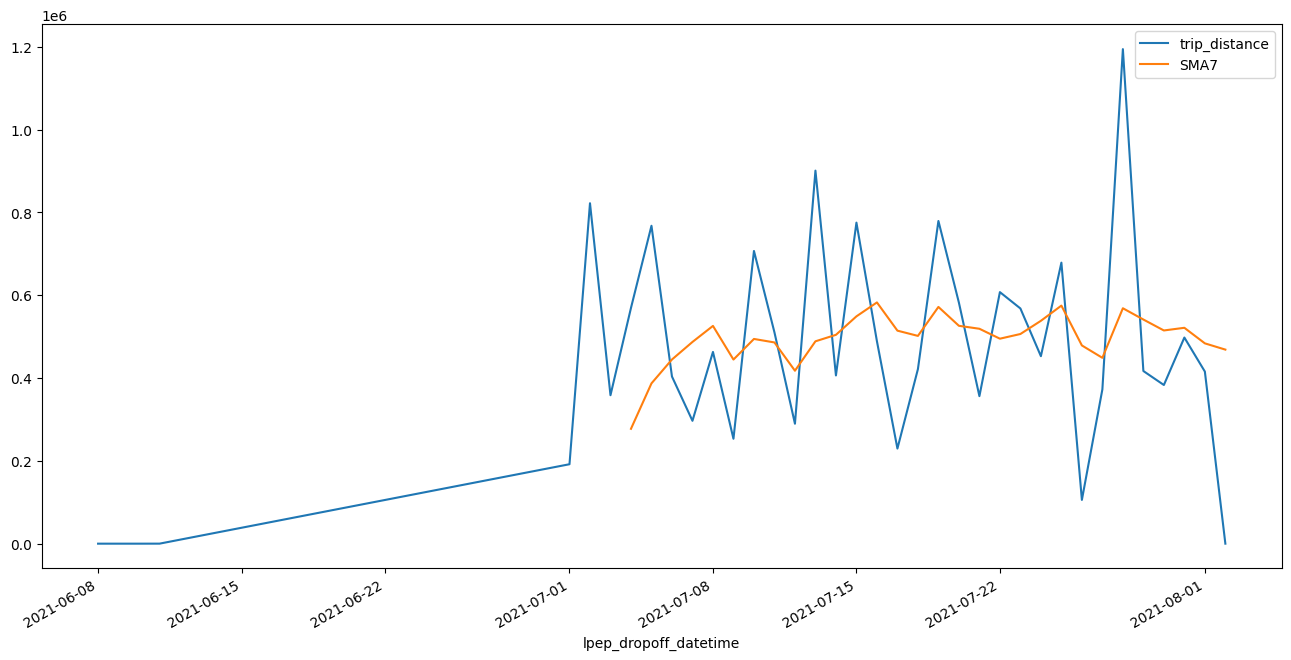

In [10]:
df_dates_a = df_dates.set_index("lpep_dropoff_datetime")
df_dates_a['SMA7'] = df_dates_a["trip_distance"].rolling(7).mean()
df_dates_a[['trip_distance', 'SMA7']].plot(figsize=(16, 8))

<Axes: xlabel='lpep_dropoff_datetime'>

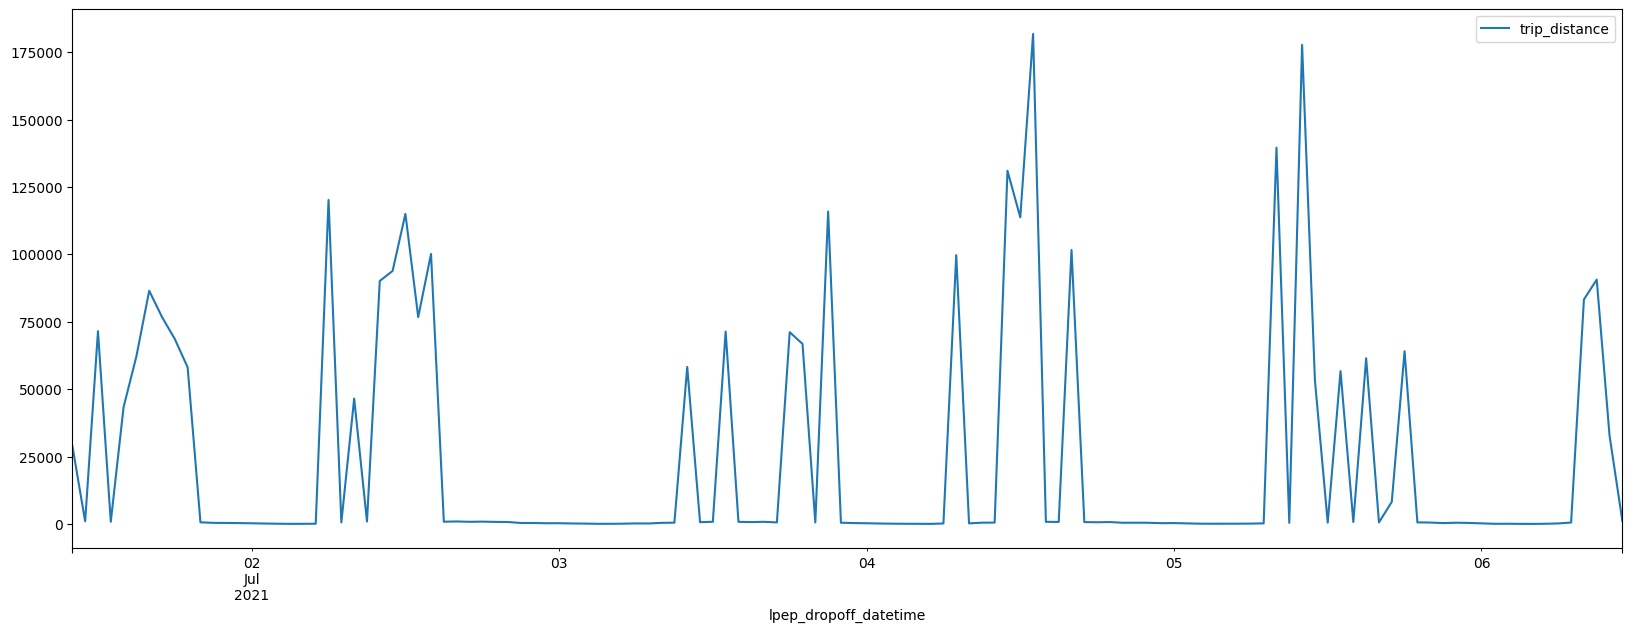

In [11]:
df_hours = df[["lpep_dropoff_datetime", "trip_distance"]].copy()
df_hours["lpep_dropoff_datetime"] = df_hours["lpep_dropoff_datetime"].dt.round('H')
df_hours = df_hours.groupby(by="lpep_dropoff_datetime").sum().reset_index()
df_hours[24:146].plot(x="lpep_dropoff_datetime", y="trip_distance", figsize=(20, 7))

#### Сезонность отсутсвует

#### Но в датасете очень много нулевых значений как и по кол-ву пассажиров, так и по дистанции поездок